<a href="https://colab.research.google.com/github/JohnPaul0403/ai_notebooks/blob/main/Cal_housing_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing problem

## Predict the price of a house in California

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
import matplotlib.pyplot as plt

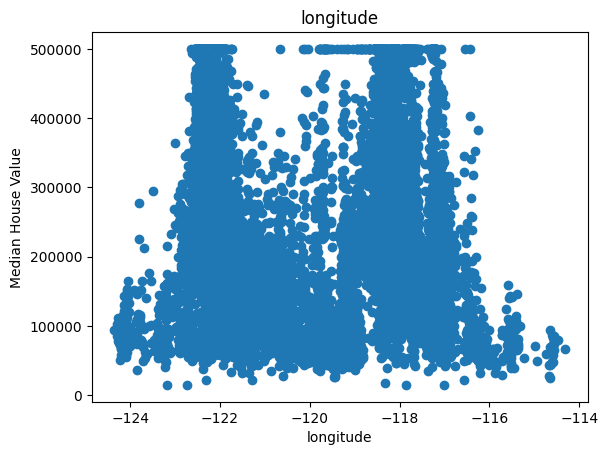

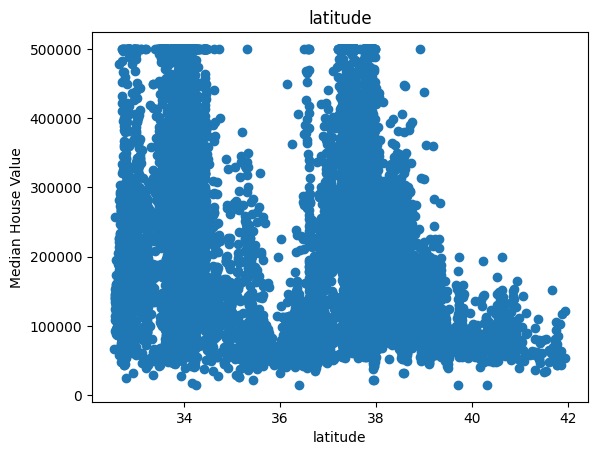

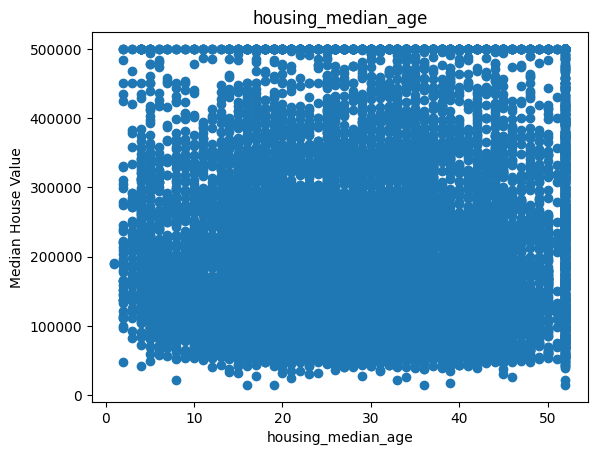

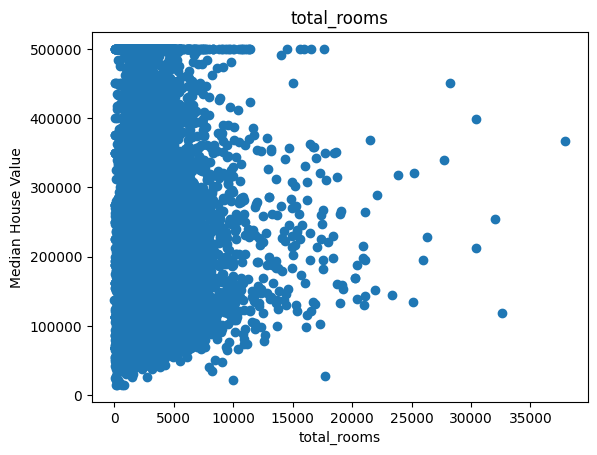

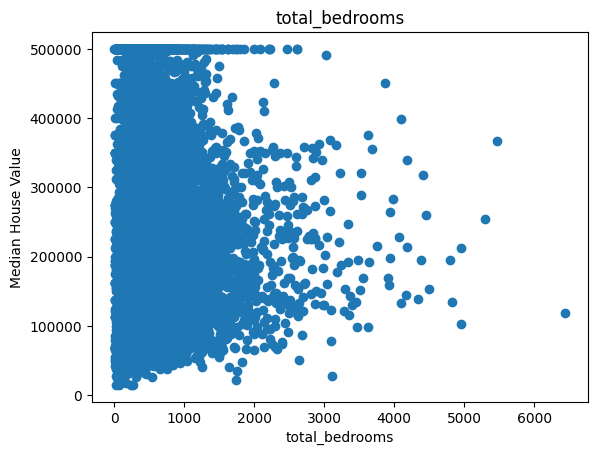

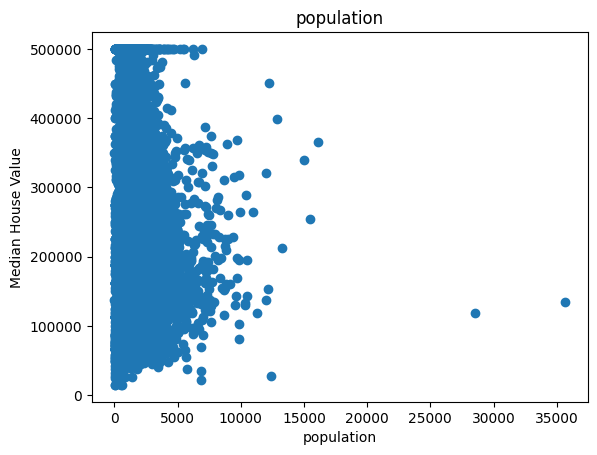

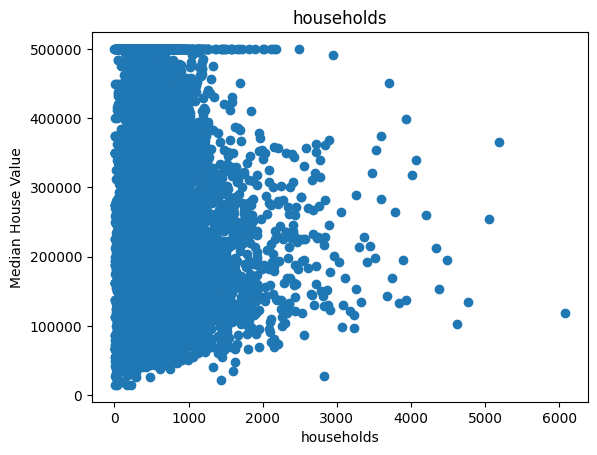

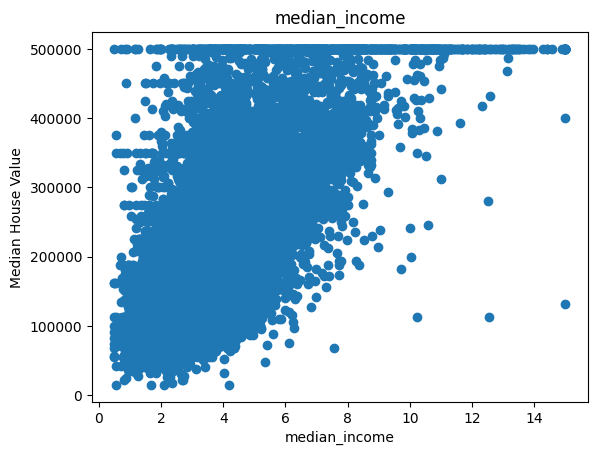

In [7]:
for label in df.columns[:-1]:
  plt.scatter(df[label], df["median_house_value"])
  plt.title(label)
  plt.ylabel("Median House Value")
  plt.xlabel(label)
  plt.show()

In [9]:
# Droppping columns without any insigth
df = df.drop(["housing_median_age", "longitude", "latitude"], axis=1)

In [22]:
df = df.dropna()
df.head()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,9497.0,1944.0,2552.0,1078.0,8.1021,411600.0
1,9160.0,2211.0,1938.0,740.0,5.4190,256600.0
2,4309.0,681.0,1817.0,612.0,7.4443,356200.0
3,1568.0,352.0,564.0,237.0,9.3276,403400.0
4,2695.0,570.0,1474.0,499.0,4.8625,147200.0


## Train/valid/test dataset

In [23]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy

In [24]:
df_test = pd.read_csv("/content/sample_data/california_housing_test.csv").drop(["housing_median_age", "longitude", "latitude"], axis=1).dropna()
df.head()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,9497.0,1944.0,2552.0,1078.0,8.1021,411600.0
1,9160.0,2211.0,1938.0,740.0,5.4190,256600.0
2,4309.0,681.0,1817.0,612.0,7.4443,356200.0
3,1568.0,352.0,564.0,237.0,9.3276,403400.0
4,2695.0,570.0,1474.0,499.0,4.8625,147200.0


In [25]:
df = df + df_test

In [26]:
df.head()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,13382.0,2605.0,4089.0,1684.0,14.7106,756300.0
1,10670.0,2521.0,2747.0,1017.0,9.0180,433100.0
2,7898.0,1188.0,3301.0,1107.0,13.2377,626700.0
3,1635.0,367.0,613.0,248.0,15.4635,733400.0
4,3936.0,814.0,2324.0,736.0,7.8000,228900.0


In [27]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [28]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [29]:
_, X_train_all, y_train_all = get_xy(train, "median_house_value", x_labels=df.columns[:-1])
_, X_val_all, y_val_all = get_xy(val, "median_house_value", x_labels=df.columns[:-1])
_, X_test_all, y_test_all = get_xy(test, "median_house_value", x_labels=df.columns[:-1])

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [32]:
all_reg.score(X_test_all, y_test_all)

0.4878533767908565

## Multiple Regression Neural Net

In [33]:
import tensorflow as tf

In [36]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [35]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(5,), axis=-1)
all_normalizer.adapt(X_train_all)

In [41]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(1)
])

In [42]:
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [44]:
history = all_nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=1000
)

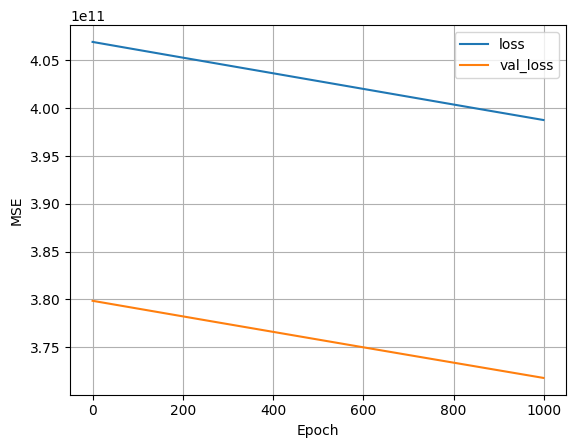

In [46]:
plot_loss(history)

## Neural Network

In [45]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(5,), axis=-1)
all_normalizer.adapt(X_train_all)

In [47]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [48]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

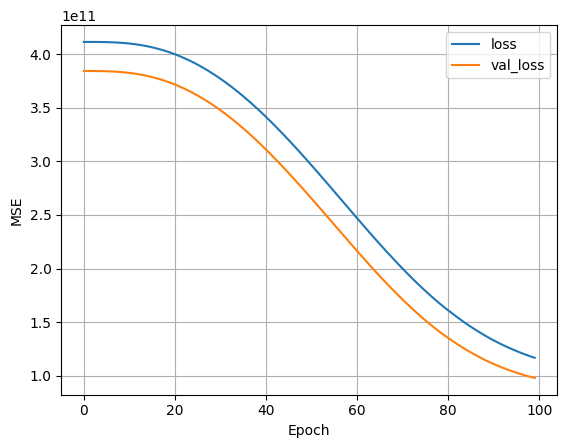

In [49]:
plot_loss(history)